<a href="https://colab.research.google.com/github/sowrabh-adiga/all-Machine-learning-codes/blob/main/Scikit_learn_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Evaluation of models


#Evaluating the results of a machine learning model is as important as building one.

https://scikit-learn.org/stable/modules/model_evaluation.html


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection as ms#               << important thing to remeber cuz the older files are deprecated. 
#get seed
import numpy as np
import pandas as pd

np.random.seed(42)

heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()
#Make data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split the data
x_train,x_test,y_train,y_test = ms.train_test_split(x,y,test_size=0.2)  # << changed here  

# Instantiate RandomForestClasifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# Eval the SVC


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Evaluation metrics:

1. Accuracy, Precision, and Recall: · 
2. F1 Score: ·
3. Log Loss/Binary Crossentropy ·:https://www.analyticsvidhya.com/blog/2021/03/binary-cross-entropy-log-loss-for-binary-classification/#:~:text=What%20is%20Binary%20Cross%20Entropy,far%20from%20the%20actual%20value.:
4. Categorical Crossentropy:  Cross-entropy is widely used as a loss function when optimizing classification models.
:https://machinelearningmastery.com/cross-entropy-for-machine-learning/ 
5. AUC.


Score method for different models have different metrics, some of them are :


r^2 : coefficeient of determination

more info : https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/a/r-squared-intuition

"R-squared measures how much prediction error we eliminated" compared to predicting without regression, by using a model.

r : correlation coeffiecent (image is formula for refrence)
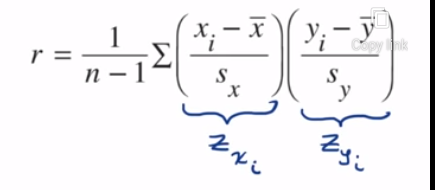


according to stackoverflow: 
https://stackoverflow.com/questions/24458163/what-are-the-parameters-for-sklearns-score-function

"It takes a feature matrix X_test and the expected target values y_test. Predictions for X_test are compared with y_test and either accuracy (for classifiers) or R² score (for regression estimators) is returned."


for more info : https://scikit-learn.org/stable/modules/model_evaluation.html

# 3 API's to evaluate

# 1) 'score' method 
# 2)Scoring parameter
# 3) problem specific method

# 1) SCORE METHOD

In [ ]:
clf.score(x_test,y_test)

0.8524590163934426

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection as ms#      
import numpy as np
np.random.seed(42)
import pandas as pd

from sklearn.datasets import load_boston
boston = load_boston()
# #create data
boston_df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
# # boston_df.head(10)
x = boston_df.drop("target",axis =1)
y = boston_df['target']

#create test and training sets
x_test,x_train,y_test,y_train = ms.train_test_split(x,y,test_size=0.2) 

#Instantiate abd fit model
model = RandomForestRegressor().fit(x_train,y_train)


In [ ]:
model.score(x_test,y_test)

0.8238769438502933

#2)Scoring parameter

cross - validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import random
import pandas as pd
from sklearn import model_selection as ms#  
import numpy as np


heart_disease = pd.read_csv("heart-disease.csv")
np.random.seed(42)

x = heart_disease.drop("target",axis=1) 
y = heart_disease['target']

x_test,x_train,y_test,y_train = ms.train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clf.score(x_test,y_test)

0.7892561983471075

In [ ]:
cross_val_score(clf,x,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

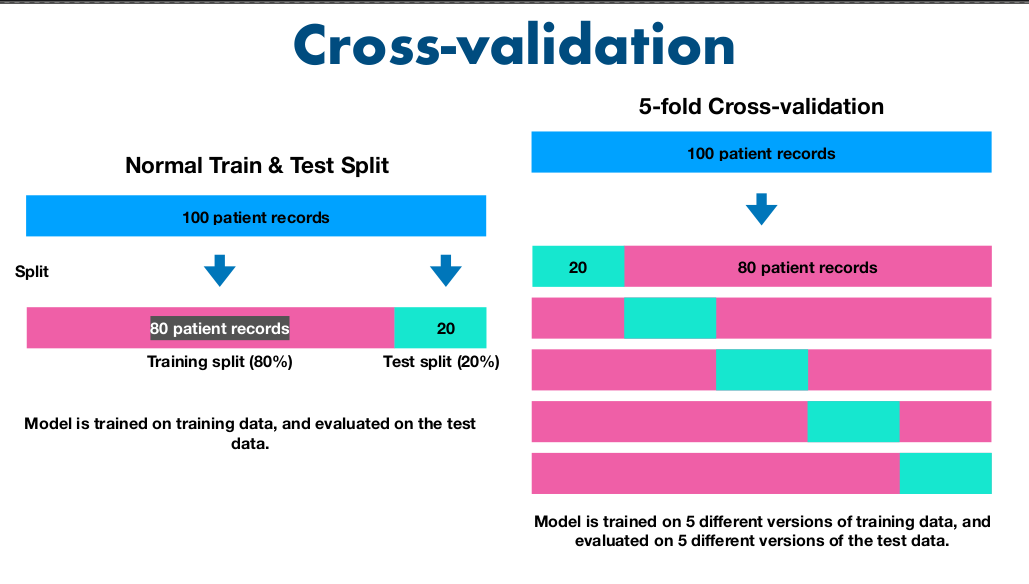

In [ ]:
cross_val_score(clf,x,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [ ]:
np.random.seed(42)

#Single Training and test split score
clf_single_score = clf.score(x_test,y_test)

#Mean of 5-fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf,x,y,cv=5))

#compare
clf_single_score,clf_cross_val_score

(0.7892561983471075, 0.8248087431693989)

##Default Scoring parameter of classifier is mean accuracy

In [ ]:
clf.score(x_test,y_test)

0.7892561983471075

In [ ]:
np.random.seed(42)
#clf.score()
#For the cross_val_score the scoring parameter is set to mean by default

cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

#Classification model evaluation metrics

1. Accuracy
2. Area under ROC Curve
3. Confusion matrix
4. Classification report


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
c = cross_val_score(clf,x,y,cv=5)


In [ ]:
print(f"Heart Disease Classifier Cross-Validation-Accuracy: {np.mean(c) *100:.2f}%")

Heart Disease Classifier Cross-Validation-Accuracy: 82.48%


#Area under ROC  (Reciever Operating Characteristic) or AUC (Area Under the Curve) 

###* Is a comparison of a models True Positive Rate (tpr) and False Positive Rate (fpr)

###True Positive : truth 1 prediction 1
###False Positive : truth 0 prediction 1
###True Negetive : truth 0 prediction 0
###False Negetive : truth 1 prediction 0



In [ ]:
#recreating the data for convinience
x_train,x_test,y_train,y_test = ms.train_test_split(x,y,train_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve
#fit  the classifieer
clf.fit(x_train,y_train)

#Make predictions with probablities
y_probs = clf.predict_proba(x_test)

#keep only true predictions as tpr & fpr are predicted to true always
y_probs[:10],len(y_probs)

(array([[0.28, 0.72],
        [0.34, 0.66],
        [0.38, 0.62],
        [0.59, 0.41],
        [0.4 , 0.6 ],
        [0.25, 0.75],
        [0.32, 0.68],
        [0.9 , 0.1 ],
        [0.09, 0.91],
        [0.31, 0.69]]), 243)

In [ ]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.72, 0.66, 0.62, 0.41, 0.6 , 0.75, 0.68, 0.1 , 0.91, 0.69])

In [ ]:
#calulate fpr and tpr, thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

#check the rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.00884956,
       0.00884956, 0.00884956, 0.00884956, 0.00884956, 0.00884956,
       0.00884956, 0.01769912, 0.01769912, 0.02654867, 0.03539823,
       0.03539823, 0.04424779, 0.04424779, 0.04424779, 0.04424779,
       0.04424779, 0.04424779, 0.04424779, 0.0619469 , 0.07079646,
       0.07964602, 0.08849558, 0.09734513, 0.12389381, 0.12389381,
       0.12389381, 0.13274336, 0.14159292, 0.15929204, 0.18584071,
       0.19469027, 0.22123894, 0.23893805, 0.23893805, 0.25663717,
       0.26548673, 0.27433628, 0.2920354 , 0.2920354 , 0.30973451,
       0.33628319, 0.34513274, 0.3539823 , 0.37168142, 0.38938053,
       0.40707965, 0.43362832, 0.45132743, 0.46902655, 0.48672566,
       0.51327434, 0.52212389, 0.53982301, 0.55752212, 0.5840708 ,
       0.60176991, 0.61061947, 0.61946903, 0.65486726, 0.67256637,
       0.72566372, 0.75221239, 0.78761062, 0.82300885, 0.87610619,
       0.92920354, 0.96460177, 0.97345133, 1.        ])

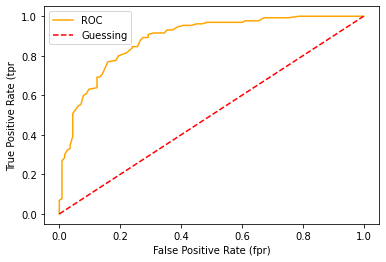

In [ ]:
#plot ROC curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
  """
    Plots ROC given fpr and tpr of a model.
  """

  #plot the curve
  plt.plot(fpr,tpr,color='orange',label="ROC")

  #plot baseline
  plt.plot([0,1],[0,1],color='red',linestyle="--",label="Guessing")

  #customize plot
  plt.xlabel("False Positive Rate (fpr)")
  plt.ylabel("True Positive Rate (tpr")
  plt.legend()
  plt.show()

plot_roc_curve(fpr,tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8846153846153846

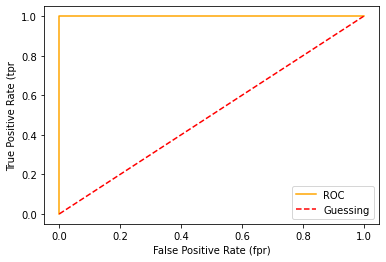

1.0

In [ ]:
#plot perfect ROC and AUC score
fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)


roc_auc_score(y_test,y_test)

##According to youtube video : https://youtu.be/4jRBRDbJemM
###1) For ROC, max tpr & lowest acceptable fpr is the threshold we need to choose
###2) AUC is used to compare the model performance on a data : greater the area (in other words greater the AUC) better is the model for the data.


#***Confusion Matrix : Is a quick way of comparing the labels a model predicts to the actual labels it was supposed to predict.***

It helps us understand where the model is getting confused

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(x_test)

confusion_matrix(y_test,y_pred)

array([[ 83,  30],
       [ 16, 114]])

In [ ]:
#viz confusion matix
pd.crosstab(y_test,
            y_pred,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,83,30
1,16,114


In [ ]:
83+16+30+114, len(x_test)

(243, 243)

In [ ]:
#if module not found
import sys
!conda install --yes --prefix {sys.prefix} seaborn 

#prefix is env path

/bin/bash: conda: command not found


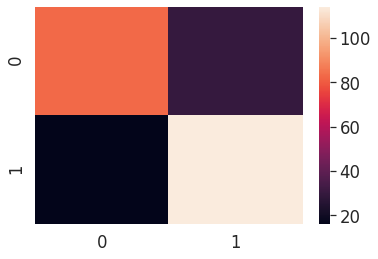

In [ ]:
#confusion matrix is made  more viz with seaborns heat map
import seaborn as sns

#set font scale
sns.set(font_scale=1.5)

#create a confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)


#plot it using season
sns.heatmap(conf_mat)

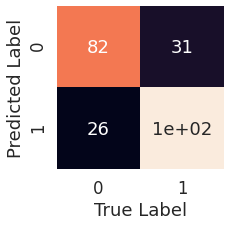

In [ ]:
def plot_conf_mat(conf_mat):
  """
  Plots confusion matrix with seaborn heatmap
  """
  fig,ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(conf_mat,       
                   annot=True, #Annotate the boxes with heatmap info
                   cbar=False)
  
  plt.xlabel("True Label")
  plt.ylabel("Predicted Label")
  #fix for mis aligned annotation
  # bottom, top = ax.get_ylim()
  # ax.set_ylim(bottom+0.5,top-0.5) 

plot_conf_mat(conf_mat)


#**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       113
           1       0.79      0.88      0.83       130

    accuracy                           0.81       243
   macro avg       0.82      0.81      0.81       243
weighted avg       0.81      0.81      0.81       243



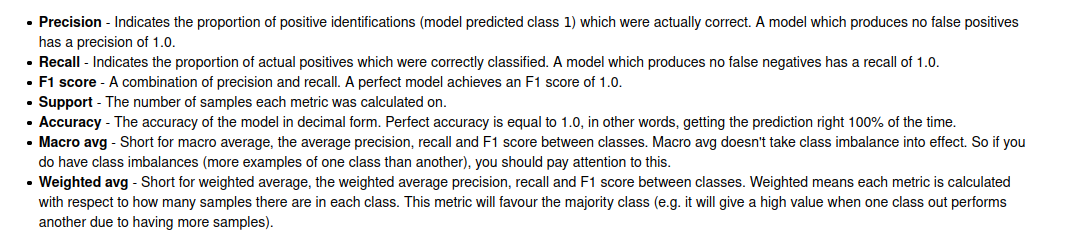

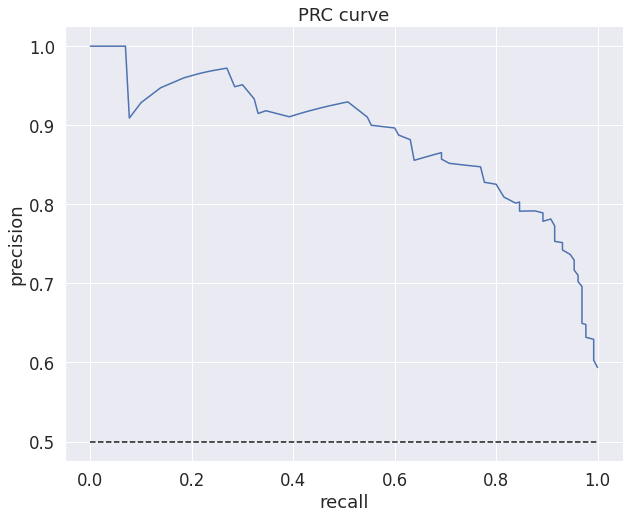

In [ ]:
from sklearn.metrics import  precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_probs_positive)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'Knn')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PRC curve')
plt.show()

more info: https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/

In [ ]:
precision

array([0.59360731, 0.60280374, 0.6056338 , 0.60849057, 0.61137441,
       0.61722488, 0.62318841, 0.62926829, 0.6318408 , 0.63819095,
       0.64467005, 0.64795918, 0.64948454, 0.65625   , 0.66666667,
       0.67021277, 0.67379679, 0.68108108, 0.68478261, 0.6961326 ,
       0.70224719, 0.71022727, 0.71676301, 0.72941176, 0.73652695,
       0.74233129, 0.7515528 , 0.75316456, 0.75796178, 0.77272727,
       0.78145695, 0.77852349, 0.78911565, 0.79166667, 0.79136691,
       0.80291971, 0.80147059, 0.80916031, 0.82539683, 0.82786885,
       0.84745763, 0.84955752, 0.85185185, 0.85714286, 0.86538462,
       0.8627451 , 0.8556701 , 0.88172043, 0.88764045, 0.89655172,
       0.9       , 0.91025641, 0.92957746, 0.92753623, 0.92424242,
       0.921875  , 0.91803279, 0.91525424, 0.91071429, 0.91836735,
       0.91489362, 0.93333333, 0.95121951, 0.94871795, 0.97222222,
       0.96969697, 0.96774194, 0.96551724, 0.96      , 0.94736842,
       0.92857143, 0.90909091, 1.        , 1.        , 1.     

In [ ]:
recall

array([1.        , 0.99230769, 0.99230769, 0.99230769, 0.99230769,
       0.99230769, 0.99230769, 0.99230769, 0.97692308, 0.97692308,
       0.97692308, 0.97692308, 0.96923077, 0.96923077, 0.96923077,
       0.96923077, 0.96923077, 0.96923077, 0.96923077, 0.96923077,
       0.96153846, 0.96153846, 0.95384615, 0.95384615, 0.94615385,
       0.93076923, 0.93076923, 0.91538462, 0.91538462, 0.91538462,
       0.90769231, 0.89230769, 0.89230769, 0.87692308, 0.84615385,
       0.84615385, 0.83846154, 0.81538462, 0.8       , 0.77692308,
       0.76923077, 0.73846154, 0.70769231, 0.69230769, 0.69230769,
       0.67692308, 0.63846154, 0.63076923, 0.60769231, 0.6       ,
       0.55384615, 0.54615385, 0.50769231, 0.49230769, 0.46923077,
       0.45384615, 0.43076923, 0.41538462, 0.39230769, 0.34615385,
       0.33076923, 0.32307692, 0.3       , 0.28461538, 0.26923077,
       0.24615385, 0.23076923, 0.21538462, 0.18461538, 0.13846154,
       0.1       , 0.07692308, 0.06923077, 0.04615385, 0.03846

Ideally :
recall >= precision ≈ accuracy


for ROC and AUC
https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5




*   ROC helps get better threshold 
*   AUC helps understand which modelling is better for given data



#Regression model evaluation metrics


###refer : https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean Absolute Error (MAE)
3. Mean Ssquared Error (MSE)


#**R^2**(Coefficient of Determination)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn import model_selection as ms#      
# import numpy as np
# np.random.seed(42)
# import pandas as pd

# from sklearn.datasets import load_boston
# boston = load_boston()
# # #create data
# boston_df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
# boston_df['target'] = pd.Series(boston['target'])
# # # boston_df.head(10)
# x = boston_df.drop("target",axis =1)
# y = boston_df['target']

# #create test and training sets
# x_test,x_train,y_test,y_train = ms.train_test_split(x,y,test_size=0.2) 

# #Instantiate abd fit model
# model = RandomForestRegressor().fit(x_train,y_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection as ms
import numpy as np
import pandas as pd
import random
np.random.seed(42)
from sklearn.datasets import load_boston
boston = load_boston()
# #create data
boston_df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
x = boston_df.drop("target",axis=1)
y = boston_df["target"]

x_train,x_test,y_train,y_test = ms.train_test_split(x,y,test_size=0.2) 

model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
model.score(x_test,y_test)

0.873969014117403

#**MAE** (Mean Absolute Error)
### Is the absolute diffrences between the prediction and expected values

In [ ]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test,y_preds)
mae

2.1226372549019623

In [ ]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["diffrences"] = df['predicted values'] - df['actual values']
df

,actual values,predicted values,diffrences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


In [ ]:
abs(df["diffrences"]).mean()

2.1226372549019614

#**MSE**(Mean Squred Error) 



In [ ]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test,y_preds)
mse


9.242328990196082

In [ ]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["diffrences"] = df['predicted values'] - df['actual values']
df

,actual values,predicted values,diffrences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


In [ ]:
(abs(df["diffrences"])**2).mean()

9.24232899019608

#**RMSE**

In [ ]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test,y_preds,squared=False)
mse

3.0401198973389327

In [ ]:
import math
math.sqrt((abs(df["diffrences"])**2).mean())

3.0401198973389323

##Tid-bit : Minimize MAE, MSE while maximizing R^2

## Finally using `Scoring` Parameter

###Accuracy

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
heart_disease = pd.read_csv('heart-disease.csv')

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()



In [ ]:
np.random.seed(42)
cv_acc = cross_val_score(clf,x,y,cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [ ]:
#cross validated accuracy

print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


##OR

In [ ]:
np.random.seed(42)
cv_acc = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


###Precision

In [ ]:
np.random.seed(42)
cv_prec = cross_val_score(clf,x,y,cv=5,scoring='precision')
print(f'The cross-validated precision is: {np.mean(cv_prec)*100:.2f}%')

The cross-validated accuracy is: 83.30%


###Recall

In [ ]:
np.random.seed(42)
cv_recall = cross_val_score(clf,x,y,cv=5,scoring='recall')
print(f'The cross-validated recall is: {np.mean(cv_recall)*100:.2f}%')

The cross-validated recall is: 85.45%


###F1

In [11]:
np.random.seed(42)
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring='f1')
print(f'The cross-validated f1 is: {np.mean(cv_f1)*100:.2f}%')

The cross-validated f1 is: 84.27%


###For another example


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x = boston_df.drop("target",axis=1)
y = boston_df['target']

model = RandomForestRegressor()

In [14]:
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,cv=5,scoring=None)
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [15]:
#r^2
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,cv=5,scoring='r2')
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [18]:
#MAE
cv_mae = cross_val_score(model,x,y,cv=5, scoring='neg_mean_absolute_error')
cv_mae

array([-2.12751961, -2.53956436, -3.42026733, -3.82432673, -3.06893069])

In [19]:
#MSE

cv_mse = cross_val_score(model,x,y,cv=5, scoring='neg_mean_squared_error')
cv_mse

array([ -7.77433365, -12.76515461, -19.26965413, -46.20221782,
       -19.10133112])

##Using metric functions

In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier().fit(x_train,y_train)

#prediction
y_preds = clf.predict(x_test)

#evaluate classifier
print('classifier metrics on test set : \n')
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test,y_preds)*100:.2f}%")
print(f"Recall: {recall_score(y_test,y_preds)*100:.2f}%")
print(f"f1: {f1_score(y_test,y_preds)*100:.2f}%")

classifier metrics on test set : 

Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
f1: 86.15%


###Regression Evaluation metrics functions

In [42]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = boston_df.drop('target',axis=1)
y = boston_df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


model = RandomForestRegressor().fit(x_train,y_train)

#prediction
y_pred = model.predict(x_test)

#Evalute
print('Regression model metrics on test set: ')

print(f'R^2: {r2_score(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
print(f'MSE: {mean_squared_error(y_test,y_pred)}')

Regression model metrics on test set: 
R^2: 0.8739690141174031
MAE: 2.1226372549019623
MSE: 9.242328990196082


In [43]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

The first predictions you make with a model are generally referred to as baseline predictions. The same goes with the first evaluation metrics you get. These are generally referred to as baseline metrics.

Your next goal is to improve upon these baseline metrics.

Two of the main methods to improve baseline metrics are from a data perspective and a model perspective.

From a data perspective asks:



1.   Could we collect more data? In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.
2.   Could we improve our data? This could mean filling in misisng values or finding a better encoding (turning things into numbers) strategy.



From a model perspective asks:


1.   Is there a better model we could use? If you've started out with a simple model, could you use a more complex one? (we saw an example of this when looking at the Scikit-Learn machine learning map, ensemble methods are generally considered more complex models)
2.   Could we improve the current model? If the model you're using performs well straight out of the box, can the hyperparameters be tuned to make it even better?




Note: Patterns in data are also often referred to as data parameters. The difference between parameters and hyperparameters is a machine learning model seeks to find parameters in data on its own, where as, hyperparameters are settings on a model which a user (you) can adjust.

Since we have two existing datasets, we'll come at exploration from a model perspective.

More specifically, we'll look at how we could improve our RandomForestClassifier and RandomForestRegressor models through hyperparameter tuning.